In [56]:

# importing panda library
import pandas as pd

import pandas as pd 
import re 
import string 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk.corpus  
from nltk.text import Text  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import ward, dendrogram, single,complete,average,weighted,centroid,median
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.cm as matcm
from networkx.algorithms import community
import math
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd 
import re 
import string 
import nltk

# Uncomment the next two lines if you miss these packages
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk.corpus  
from nltk import bigrams
from nltk.text import Text 
import itertools
import collections
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import ward, dendrogram, single,complete,average,weighted,centroid,median
from scipy.spatial.distance import pdist
import spacy
import math
import numpy as np
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# set PYTHONHASHSEED to have Gensim Reproducability
%env PYTHONHASHSEED=0
    
    

env: PYTHONHASHSEED=0


In [57]:
df = pd.read_csv('all_testimony.txt', sep=";", names=['Testimony_Text'])
df.head(5)

,Testimony_Text
0,"Commissioner Conway, members, I thank you for ..."
1,"Hello, my name is Jim Cosby I am a social work..."
2,Good afternoon my name is Megan Marx-Varela an...
3,Thank you my name is Rebecca Reynolds I use sh...
4,"Hello my name is Ami Garry, thank you so much ..."


In [58]:
import pandas as pd

df = pd.read_excel('All Testimony.xlsx')

print(df)

                                     Name Testimony_Length  \
0                         Ellen Laurence          04:57:00   
1                              Jim Cosby          13:38:00   
2                      Megan Marx Varela          03:52:00   
3                       Rebecca Reynolds          04:56:00   
4                               Ami Gary          06:25:00   
..                                    ...              ...   
63                         Carrie Gaytan          10:12:00   
64                         Brian Tallant          08:15:00   
65                          Deanna Towne          09:00:00   
66  Gregory King – Behavioral Task Force          08:21:00   
67                         Larry & Bette          07:33:00   

                                       Testimony_Text Unnamed: 3  
0   Commissioner Conway, members, I thank you for ...        NaN  
1   Hello, my name is Jim Cosby I am a social work...        NaN  
2   Good afternoon my name is Megan Marx-Varela an... 

C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [59]:
df["Testimony_Text"]

0     Commissioner Conway, members, I thank you for ...
1     Hello, my name is Jim Cosby I am a social work...
2     Good afternoon my name is Megan Marx-Varela an...
3     Thank you my name is Rebecca Reynolds I use sh...
4     Hello my name is Ami Garry, thank you so much ...
                            ...                        
63    My name is Carrie Gayton and I just want to sa...
64    Thanks for having me today. My name is Brian T...
65    Let’s start by referring to pueblo chieftain a...
66    My name is Gregory king we live in Jefferson C...
67    Our beautiful son was diagnosed with schizophr...
Name: Testimony_Text, Length: 68, dtype: object

In [60]:
import pandas as pd 
fileName = 'All Testimony.xlsx'
df = pd.read_excel(fileName)

C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\ewing\anaconda33\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [61]:
df.head()

,Name,Testimony_Length,Testimony_Text,Unnamed: 3
0,Ellen Laurence,04:57:00,"Commissioner Conway, members, I thank you for ...",NaN
1,Jim Cosby,13:38:00,"Hello, my name is Jim Cosby I am a social work...",NaN
2,Megan Marx Varela,03:52:00,Good afternoon my name is Megan Marx-Varela an...,NaN
3,Rebecca Reynolds,04:56:00,Thank you my name is Rebecca Reynolds I use sh...,NaN
4,Ami Gary,06:25:00,"Hello my name is Ami Garry, thank you so much ...",NaN


In [62]:
df2 = df[['Name','Testimony_Length','Testimony_Text']]

In [63]:
df2.head()

,Name,Testimony_Length,Testimony_Text
0,Ellen Laurence,04:57:00,"Commissioner Conway, members, I thank you for ..."
1,Jim Cosby,13:38:00,"Hello, my name is Jim Cosby I am a social work..."
2,Megan Marx Varela,03:52:00,Good afternoon my name is Megan Marx-Varela an...
3,Rebecca Reynolds,04:56:00,Thank you my name is Rebecca Reynolds I use sh...
4,Ami Gary,06:25:00,"Hello my name is Ami Garry, thank you so much ..."


In [64]:
df2.article_title = df2.Testimony_Text.astype(str)
df2.head()

<ipython-input-64-dc4a4532b450>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.article_title = df2.Testimony_Text.astype(str)


,Name,Testimony_Length,Testimony_Text
0,Ellen Laurence,04:57:00,"Commissioner Conway, members, I thank you for ..."
1,Jim Cosby,13:38:00,"Hello, my name is Jim Cosby I am a social work..."
2,Megan Marx Varela,03:52:00,Good afternoon my name is Megan Marx-Varela an...
3,Rebecca Reynolds,04:56:00,Thank you my name is Rebecca Reynolds I use sh...
4,Ami Gary,06:25:00,"Hello my name is Ami Garry, thank you so much ..."


In [116]:
import nltk
import string 
from nltk.corpus import stopwords

nltk.download('stopwords')

global_stopwords = stopwords.words("english")
local_stopwords = [c for c in string.punctuation] +\
                  ['ca', 'use','’', '``', '…', '...', "''", '‘', '“', '”', "'m", "'re", "'s", "'ve", 'amp', 'https', "n't", 'rt', 
                   'a…', 'co', 'i…','itâ€™s', 'â€\x9d', 'one', 'could','would', 'also', 'â€', 'said', '—', 'itâ', 'Hello', 'hello',
                  'name', 'html', 'lois', 'my', 'name','hello', 'im', 'thats', 'know', 'like', 'think', 'things', 'lot', 'really', 'got', 'want',
                   'dont', 'said', 'think', 'come', 'able', 'make', 'right', 'going', 'theres', 'good', 'ive', 'thing', 'thank', 'theyre', 'say',
                   'hard', 'work', 'way', 'today', 'son', 'didnt', 'weve', 'talk', 'person', 'great', 'getting', 'better', 'life', 'colorado',
                   'needed', 'told', 'provide', 'different', 'day', 'working', 'hes', 'tell', 'county', 'trying', 'came', 'kind', 'issues', 'illness',
                   'home', 'disorder', 'people', 'went', 'actually', 'individuals', 'little', 'public', 'kids', 'child', 'year',
                   'week', 'somebody', 'look', 'point', 'place', 'months', 'worked', 'new', 'old', 'times', 'room', 'started', 'youre', 'ill', 'denver',
                   'david', 'live', 'number', 'money', 'issue', 'wasnt', 'husband', 'let', 'drew', 'serve', 'stay', 'heard', 'doesnt', 'week', 'deal', 'cause',
                   'called', 'hope', 'wanted', 'order', 'happen', 'jefferson', 'looking', 'probably', 'ago', 'share', 'asked', 'understand', 'took', 'brain',
                   'tried', 'daughter', 'taking', 'took', 'believe', 'feel', 'best', 'ask', 'maybe', 'days', 'seen', 'continue', 'task', 'based', 'start',
                   'bit', 'ok', 'important', 'meet', 'big', 'fort', 'logan', 'lives', 'saying', 'mother', 'finally', 'force', 'receive', 'talked', 
                   'happened', 'mean', 'try', 'city', 'states', 'whats', 'figure', 'guys', 'coming', 'lets', 'age', 'reason', 'areas', 'home', 'address', 'pueblo',
                   'second', 'given', 'end', 'head', 'na', 'sister', 'later', 'means', 'oh', 'area', 'brother', 'folks', 'month', 'isnt', 'oh', 'sort',
                   'grand', 'past', 'used', 'leave', 'th', 'gave', 'fact', 'coloradans', 'act', 'kid', 'include', 'pretty', 'wouldnt', 'open', 'phone', 'problems',
                   'simply', 'afternoon', 'taken', 'provided', 'felt', 'sign', 'stories', 'ways', 'happens', 'junction', 'shes', 'using', 'follow', 'making', 'board',
                   'everybody', 'individual', 'dealing', 'springs', 'emotional', 'wont', 'fit', 'forward', 'received', 'january', 'hour', 'step', 'cases', 'population',
                   'takes', 'friend', 'experienced', 'looked', 'knew', 'real', 'office', 'face', 'counties', 'industry', 'makes', 'read', 'personal', 'recently', 'general',
                   'idea', 'worse', 'self', 'seeking', 'gone', 'meetings', 'cover', 'morning', 'works', 'spent', 'spend', 'building', 'efforts', 'bennefit', 'specifically',
                   'sorry', 'appreciate', 'listening', 'jeffco', 'small', 'absolutely', 'places', 'theyve','focus','gon', 'go', 'one', 'every', 'see',
                   'two', 'cant', 'another', 'us', 'call', 'put', 'back', 'everything', 'four', 'less', 'even', 'may', 'around', 'three', 'six', 'sure', 'give', 'last', 'weeks',
                   'together', 'still', 'keep', 'enough', 'often', 'done', 'find', 'made', 'much', 'many', 'well', 'within', 'almost', 'become', 'found',
                   'never', 'take', 'level', 'thought', 'whole', 'something', 'without', 'first', 'someone', 'everyone', 'part', 'anything', 'side', 'away', 'need']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ewing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df2.Testimony_Text)

In [118]:
X.shape

(68, 5173)

In [119]:
k = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

In [120]:
%time kmeans.fit(X)

Wall time: 92.7 ms


KMeans(n_clusters=5, random_state=0)

In [121]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.01588578, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0258611 , 0.00707923, ..., 0.        , 0.00258849,
        0.        ],
       [0.        , 0.00935682, 0.01041209, ..., 0.        , 0.00272493,
        0.00127203],
       [0.00289789, 0.03668673, 0.02189951, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01641234, 0.01005338, ..., 0.00704727, 0.00633494,
        0.        ]])

In [122]:
kmeans.cluster_centers_.shape

(5, 5173)

In [123]:
kmeans.labels_

array([2, 2, 1, 2, 0, 2, 2, 2, 4, 2, 2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 1, 2, 4, 2, 1, 1, 4, 2, 1, 2, 4, 4, 1, 2, 4, 1, 2, 2,
       2, 2])

In [124]:
df2["cluster"] = kmeans.labels_
df2[["Testimony_Text", "cluster"]]

,Testimony_Text,cluster
0,"Commissioner Conway, members, I thank you for ...",2
1,"Hello, my name is Jim Cosby I am a social work...",2
2,Good afternoon my name is Megan Marx-Varela an...,1
3,Thank you my name is Rebecca Reynolds I use sh...,2
4,"Hello my name is Ami Garry, thank you so much ...",0
...,...,...
63,My name is Carrie Gayton and I just want to sa...,1
64,Thanks for having me today. My name is Brian T...,2
65,Let’s start by referring to pueblo chieftain a...,2
66,My name is Gregory king we live in Jefferson C...,2


In [125]:
df2.cluster.value_counts()

2    35
3    11
1    11
4     7
0     4
Name: cluster, dtype: int64

In [126]:
counts = df2.cluster.value_counts()
df2[df2.cluster == counts.idxmax()].sample(10, replace=False, random_state=0)[["Testimony_Text", "cluster"]]

,Testimony_Text,cluster
57,I didn’t really know what to expect this morni...,2
37,OK so my name is Judie Amable and I am on the ...,2
32,And I am here today representing many families...,2
55,Thank you very much and thanks for allowing me...,2
39,Hello my name is Janet Van der Laak and I am M...,2
30,"My name is Vanessa Benjamin-rus, I live in Gra...",2
16,Little bit about myself how I got here I've ha...,2
3,Thank you my name is Rebecca Reynolds I use sh...,2
17,"Till 2013, I spent 32 years at the University ...",2
51,Thanks for doing the work that you're doing I ...,2


In [127]:
import nltk
df2["words"] = df2.article_title.apply(lambda x: nltk.word_tokenize(x))
df2["tagged_words"] = df2.words.apply(lambda x: nltk.pos_tag(x))

from collections import Counter

def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)
            
        counter.update(word_set)
        
    return counter

In [128]:
counter_max = get_counter(df2[df2.cluster == counts.idxmax()], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('mental', 30),
 ('time', 30),
 ('health', 30),
 ('years', 29),
 ('get', 29),
 ('help', 27),
 ('care', 27),
 ('system', 27),
 ('state', 25),
 ('treatment', 23),
 ('hospital', 23),
 ('support', 22),
 ('long', 22),
 ('needs', 22),
 ('family', 21),
 ('community', 21),
 ('services', 19),
 ('center', 17),
 ('program', 17),
 ('therapy', 16),
 ('insurance', 16),
 ('access', 16),
 ('resources', 15),
 ('medicaid', 15),
 ('psychiatrist', 15),
 ('behavioral', 14),
 ('experience', 14),
 ('school', 14),
 ('situation', 13),
 ('crisis', 13)]

In [129]:
counter_min = get_counter(df2[df2.cluster == counts.idxmin()], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('medications', 4),
 ('help', 4),
 ('story', 3),
 ('years', 3),
 ('care', 3),
 ('medication', 3),
 ('health', 3),
 ('experience', 3),
 ('else', 3),
 ('family', 2),
 ('community', 2),
 ('fine', 2),
 ('wait', 2),
 ('access', 2),
 ('9', 2),
 ('happening', 2),
 ('mental', 2),
 ('psychiatrist', 2),
 ('physician', 2),
 ('diagnosed', 2),
 ('since', 2),
 ('living', 2),
 ('diagnosis', 2),
 ('goes', 2),
 ('medical', 2),
 ('please', 2),
 ('services', 2),
 ('facility', 2),
 ('range', 2),
 ('system', 2)]

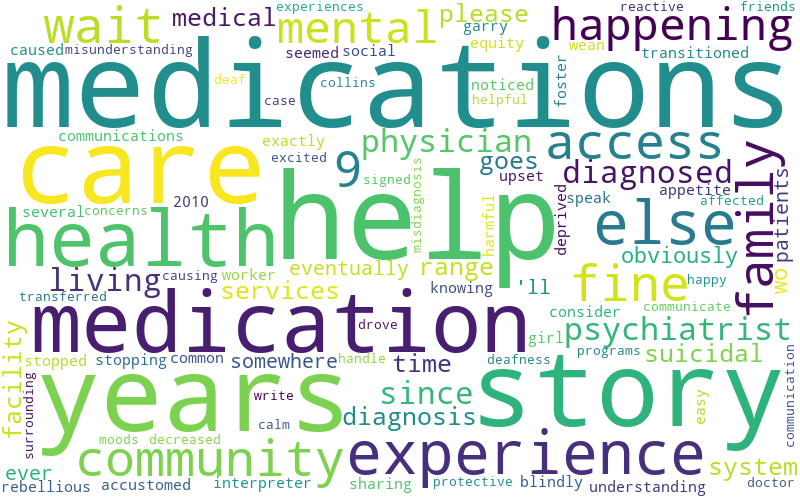

In [130]:
from wordcloud import WordCloud
from IPython.display import Image
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter_min)
wc.to_file("wordcloud.png")
Image(filename="wordcloud.png")

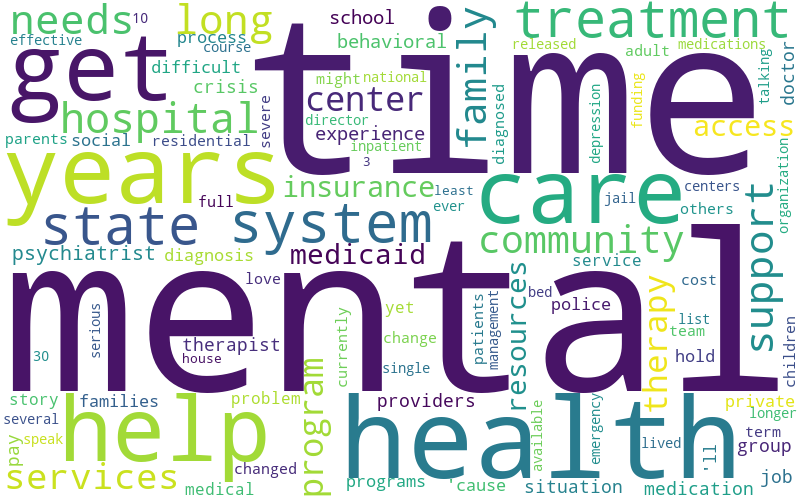

In [131]:
from wordcloud import WordCloud
from IPython.display import Image
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter_max)
wc.to_file("wordcloud.png")
Image(filename="wordcloud.png")

In [132]:
### LDA Topic Modeling

In [133]:
num_topics = 5

In [134]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=num_topics, random_state=0)   # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=5, random_state=0)

In [135]:
%time lda.fit(X)

Wall time: 269 ms


LatentDirichletAllocation(n_components=5, random_state=0)

In [136]:
lda.components_

array([[0.20000717, 0.20001571, 0.52000528, ..., 0.20000636, 0.25644869,
        0.20000632],
       [0.20000703, 0.68021097, 0.43939026, ..., 0.24930559, 0.24409359,
        0.20000629],
       [0.20000735, 0.20001637, 0.2000303 , ..., 0.20000664, 0.20003478,
        0.20000652],
       [0.23184796, 0.37409741, 0.24681411, ..., 0.20000611, 0.20003271,
        0.2000062 ],
       [0.20000725, 0.67606064, 0.410866  , ..., 0.20000621, 0.26758071,
        0.2444957 ]])

In [137]:
lda.components_.shape

(5, 5173)

In [138]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("***Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [139]:
show_topics(lda, vectorizer.get_feature_names(), 10)

***Topic 0:
1.29 * deaf + 0.82 * primary + 0.79 * mhcd + 0.77 * services + 0.77 * treatment + 0.67 * hearing + 0.64 * insurance + 0.62 * jail + 0.58 * behavioral + 0.55 * injuries

***Topic 1:
2.22 * services + 1.82 * treatment + 1.81 * school + 1.53 * system + 1.50 * community + 1.47 * behavioral + 1.32 * youth + 1.24 * insurance + 1.22 * state + 1.13 * needs

***Topic 2:
0.57 * parole + 0.56 * trans + 0.50 * clients + 0.50 * gender + 0.48 * alters + 0.46 * probation + 0.46 * pta + 0.44 * amazing + 0.44 * discharged + 0.44 * comes

***Topic 3:
1.48 * hearing + 1.27 * treatment + 0.95 * deaf + 0.89 * services + 0.87 * behavioral + 0.87 * patients + 0.87 * loss + 0.82 * system + 0.81 * program + 0.79 * hospital

***Topic 4:
1.65 * deaf + 1.03 * insurance + 0.97 * hearing + 0.85 * therapy + 0.79 * drugs + 0.77 * change + 0.73 * access + 0.69 * treatment + 0.68 * contract + 0.68 * 000



In [140]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [141]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.009567  0.000420       1        1  43.126627
3      0.001644 -0.005932       2        1  23.291861
4      0.002199  0.002498       3        1  15.801313
0      0.002157  0.001757       4        1  12.607858
2      0.003568  0.001258       5        1   5.172342, topic_info=            Term      Freq     Total Category  logprob  loglift
1318        deaf  0.000000  0.000000  Default  30.0000  30.0000
2257     hearing  0.000000  0.000000  Default  29.0000  29.0000
3405      parole  0.000000  0.000000  Default  28.0000  28.0000
3052        mhcd  0.000000  0.000000  Default  27.0000  27.0000
4793       trans  0.000000  0.000000  Default  26.0000  26.0000
...          ...       ...       ...      ...      ...      ...
1942       field  0.014212  0.191251   Topic5  -7.9711   0.3624
1063   competent  0.013107  0.159362   Topic5  -8.0520   0.4638
1945       fight  0.013647  0.193181   Topic5  -8.0117   0.3117
3015   medicines  0.013262  0.181995   Topic5  -8.0403   0.3427
4711  therapists  0.013368  0.251552   Topic5  -8.0323   0.0271

[296 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4219      1  1.204524  services, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

In [145]:
### Bi-grams

In [146]:
words_in_post = [post.lower().split() for post in processed_posts]
posts = [[word for word in post_words] for post_words in words_in_post]

# Create list of lists containing bigrams in posts
terms_bigram = [list(bigrams(post)) for post in posts]

TypeError: 'list' object is not callable

In [147]:
def TextPreprocessing(text): 
    # get lowercase
    text = text.lower()
    # remove numbers    # remove numbers

    text = re.sub(r'\d+', '', text)
    # remove urls
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    # remove punctuation
    text = text.translate(text.maketrans('', '', string.punctuation))
    # strip whitespace
    text = text.strip()
    # remove stop words
    stop_words = stopwords.words('english')
    newStopWords = ['’', '``', '…', '...', "''", '‘', '“', '”', "'m", "'re", "'s", "'ve", 'amp', 'https', "n't", 'rt', 
                   'a…', 'co', 'i…','itâ€™s', 'â€\x9d', 'one', 'could','would', 'also', 'â€', 'said', '—', 'itâ', 'Hello', 'hello',
                  'name', 'html', 'lois', 'my', 'name','hello', 'im', 'thats', 'know', 'like', 'think', 'things', 'lot', 'really', 'got', 'want',
                   'dont', 'said', 'think', 'come', 'able', 'make', 'right', 'going', 'theres', 'good', 'ive', 'thing', 'thank', 'theyre', 'say',
                   'hard', 'work', 'way', 'today', 'son', 'didnt', 'weve', 'talk', 'person', 'great', 'getting', 'better', 'life', 'colorado',
                   'needed', 'told', 'provide', 'different', 'day', 'working', 'hes', 'tell', 'county', 'trying', 'came', 'kind', 'issues', 'illness',
                   'home', 'disorder', 'people', 'went', 'actually', 'individuals', 'little', 'public', 'kids', 'child', 'year',
                   'week', 'somebody', 'look', 'point', 'place', 'months', 'worked', 'new', 'old', 'times', 'room', 'started', 'youre', 'ill', 'denver',
                   'david', 'live', 'number', 'money', 'issue', 'wasnt', 'husband', 'let', 'drew', 'serve', 'stay', 'heard', 'doesnt', 'week', 'deal', 'cause',
                   'called', 'hope', 'wanted', 'order', 'happen', 'jefferson', 'looking', 'probably', 'ago', 'share', 'asked', 'understand', 'took', 'brain',
                   'tried', 'daughter', 'taking', 'took', 'believe', 'feel', 'best', 'ask', 'maybe', 'days', 'seen', 'continue', 'task', 'based', 'start',
                   'bit', 'ok', 'important', 'meet', 'big', 'fort', 'logan', 'lives', 'saying', 'mother', 'finally', 'force', 'receive', 'talked', 
                   'happened', 'mean', 'try', 'city', 'states', 'whats', 'figure', 'guys', 'coming', 'lets', 'age', 'reason', 'areas', 'home', 'address', 'pueblo',
                   'second', 'given', 'end', 'head', 'na', 'sister', 'later', 'means', 'oh', 'area', 'brother', 'folks', 'month', 'isnt', 'oh', 'sort',
                   'grand', 'past', 'used', 'leave', 'th', 'gave', 'fact', 'coloradans', 'act', 'kid', 'include', 'pretty', 'wouldnt', 'open', 'phone', 'problems',
                   'simply', 'afternoon', 'taken', 'provided', 'felt', 'sign', 'stories', 'ways', 'happens', 'junction', 'shes', 'using', 'follow', 'making', 'board',
                   'everybody', 'individual', 'dealing', 'springs', 'emotional', 'wont', 'fit', 'forward', 'received', 'january', 'hour', 'step', 'cases', 'population',
                   'takes', 'friend', 'experienced', 'looked', 'knew', 'real', 'office', 'face', 'counties', 'industry', 'makes', 'read', 'personal', 'recently', 'general',
                   'idea', 'worse', 'self', 'seeking', 'gone', 'meetings', 'cover', 'morning', 'works', 'spent', 'spend', 'building', 'efforts', 'bennefit', 'specifically',
                   'sorry', 'appreciate', 'listening', 'jeffco', 'small', 'absolutely', 'places', 'theyve','focus','gon', 'go', 'one', 'every', 'see',
                   'two', 'cant', 'another', 'us', 'call', 'put', 'back', 'everything', 'four', 'less', 'even', 'may', 'around', 'three', 'six', 'sure', 'give', 'last', 'weeks',
                   'together', 'still', 'keep', 'enough', 'often', 'done', 'find', 'made', 'much', 'many', 'well', 'within', 'almost', 'become', 'found',
                   'never', 'take', 'level', 'thought', 'whole', 'something', 'without', 'first', 'someone', 'everyone', 'part', 'anything', 'side', 'away'] 
    stop_words.extend(newStopWords)
    stop_words = set(stop_words)
    tokens = word_tokenize(text)
    words = [w for w in tokens if not w in stop_words]
    text = " ".join(w for w in words)


    return text

In [148]:
posts = df2.Testimony_Text.values
# preprocess posts

processed_posts = [TextPreprocessing(text) for text in posts]
# Find frequent words and Generate word and frequency list

vectorizer = CountVectorizer(stop_words='english', lowercase = True) 
# Now X is the document-term matrix. 

x = vectorizer.fit_transform(processed_posts)
sum_words = x.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:40]

[('health', 460),
 ('mental', 332),
 ('care', 259),
 ('services', 220),
 ('treatment', 206),
 ('need', 183),
 ('years', 174),
 ('time', 156),
 ('help', 138),
 ('community', 130),
 ('behavioral', 129),
 ('state', 124),
 ('insurance', 122),
 ('needs', 102),
 ('school', 100),
 ('access', 99),
 ('deaf', 98),
 ('hearing', 98),
 ('family', 92),
 ('program', 89),
 ('families', 78),
 ('support', 76),
 ('medicaid', 74),
 ('center', 72),
 ('hospital', 71),
 ('therapy', 68),
 ('use', 56),
 ('funding', 55),
 ('crisis', 54),
 ('providers', 54),
 ('long', 51),
 ('resources', 50),
 ('diagnosis', 49),
 ('experience', 47),
 ('children', 46),
 ('provider', 46),
 ('therapist', 46),
 ('jail', 44),
 ('pay', 44),
 ('social', 43)]

In [149]:
testimony = df2.Testimony_Text.values
text = " ".join(t for t in testimony)
# preprocess text
processed_text = TextPreprocessing(text)

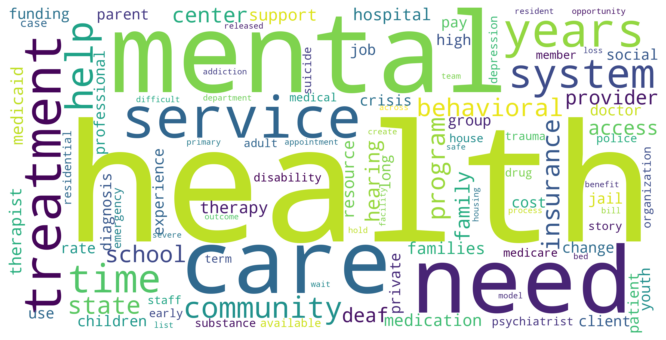

In [150]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, background_color = 'white',
                      scale = 6, collocations=False).generate(processed_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [151]:
words_in_post = [post.lower().split() for post in processed_posts]
posts = [[word for word in post_words] for post_words in words_in_post]

# Create list of lists containing bigrams in posts
terms_bigram = [list(bigrams(post)) for post in posts]

TypeError: 'list' object is not callable

In [152]:
terms_bigram[2]

[('megan', 'marxvarela'),
 ('marxvarela', 'behalf'),
 ('behalf', 'coalition'),
 ('coalition', 'parity'),
 ('parity', 'multiple'),
 ('multiple', 'data'),
 ('data', 'sources'),
 ('sources', 'estimate'),
 ('estimate', 'mental'),
 ('mental', 'health'),
 ('health', 'substance'),
 ('substance', 'use'),
 ('use', 'nearly'),
 ('nearly', 'half'),
 ('half', 'treatment'),
 ('treatment', 'services'),
 ('services', 'years'),
 ('years', 'since'),
 ('since', 'mental'),
 ('mental', 'health'),
 ('health', 'parity'),
 ('parity', 'addiction'),
 ('addiction', 'equity'),
 ('equity', 'mapia'),
 ('mapia', 'passed'),
 ('passed', 'seven'),
 ('seven', 'years'),
 ('years', 'since'),
 ('since', 'final'),
 ('final', 'rule'),
 ('rule', 'imperative'),
 ('imperative', 'enacted'),
 ('enacted', 'affordable'),
 ('affordable', 'care'),
 ('care', 'extended'),
 ('extended', 'mental'),
 ('mental', 'health'),
 ('health', 'addiction'),
 ('addiction', 'parity'),
 ('parity', 'receiving'),
 ('receiving', 'medicaid'),
 ('medicaid'

In [153]:

bigrams = list(itertools.chain(*terms_bigram))


bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(mental, health)",269
1,"(behavioral, health)",111
2,"(health, care)",54
3,"(deaf, hearing)",37
4,"(community, mental)",32
5,"(health, services)",31
6,"(health, center)",25
7,"(health, system)",24
8,"(hearing, loss)",20
9,"(substance, use)",19


In [154]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [155]:
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

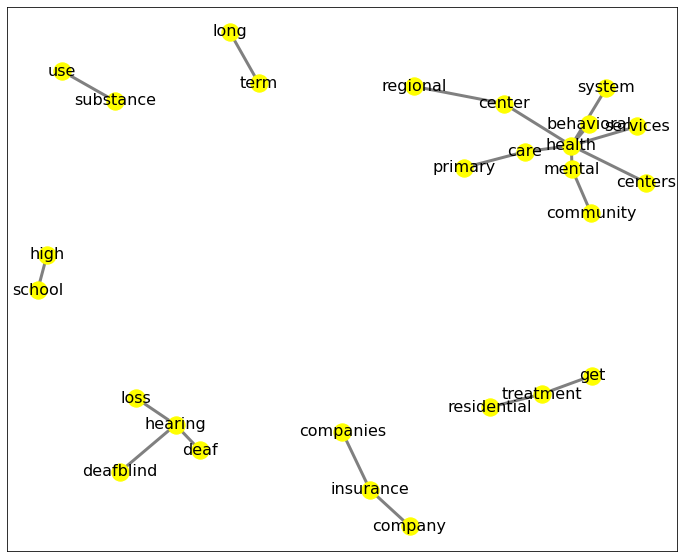

In [156]:
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='yellow',
                 with_labels = True,
                 ax=ax)
    
plt.show()

In [157]:
df2['Testimony_Text'] = df2['Testimony_Text'].astype(str)

In [158]:
df2["Testimony_Text_text_splits"] = df2.Testimony_Text.str.split()

In [159]:
# Change data feature to string

df2['Testimony_Text_text_splits'] = df2['Testimony_Text_text_splits'].astype(str)

In [160]:
df2['Testimony_Text_text_splits'].head()

0    ['Commissioner', 'Conway,', 'members,', 'I', '...
1    ['Hello,', 'my', 'name', 'is', 'Jim', 'Cosby',...
2    ['Good', 'afternoon', 'my', 'name', 'is', 'Meg...
3    ['Thank', 'you', 'my', 'name', 'is', 'Rebecca'...
4    ['Hello', 'my', 'name', 'is', 'Ami', 'Garry,',...
Name: Testimony_Text_text_splits, dtype: object

In [161]:
df2.head()

,Name,Testimony_Length,Testimony_Text,cluster,words,tagged_words,Testimony_Text_text_splits,Sentiment
0,Ellen Laurence,04:57:00,"Commissioner Conway, members, I thank you for ...",2,"[Commissioner, Conway, ,, members, ,, I, thank...","[(Commissioner, NNP), (Conway, NNP), (,, ,), (...","['Commissioner', 'Conway,', 'members,', 'I', '...",1
1,Jim Cosby,13:38:00,"Hello, my name is Jim Cosby I am a social work...",2,"[Hello, ,, my, name, is, Jim, Cosby, I, am, a,...","[(Hello, NNP), (,, ,), (my, PRP$), (name, NN),...","['Hello,', 'my', 'name', 'is', 'Jim', 'Cosby',...",1
2,Megan Marx Varela,03:52:00,Good afternoon my name is Megan Marx-Varela an...,1,"[Good, afternoon, my, name, is, Megan, Marx-Va...","[(Good, JJ), (afternoon, NN), (my, PRP$), (nam...","['Good', 'afternoon', 'my', 'name', 'is', 'Meg...",1
3,Rebecca Reynolds,04:56:00,Thank you my name is Rebecca Reynolds I use sh...,2,"[Thank, you, my, name, is, Rebecca, Reynolds, ...","[(Thank, NN), (you, PRP), (my, PRP$), (name, N...","['Thank', 'you', 'my', 'name', 'is', 'Rebecca'...",1
4,Ami Gary,06:25:00,"Hello my name is Ami Garry, thank you so much ...",0,"[Hello, my, name, is, Ami, Garry, ,, thank, yo...","[(Hello, NNP), (my, PRP$), (name, NN), (is, VB...","['Hello', 'my', 'name', 'is', 'Ami', 'Garry,',...",1


In [162]:
# Word Network Analysis

In [163]:
from collections import Counter

###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################

counter = Counter()
co_counter = dict()

for l in df2.words:
    word_set = set()
    
    for item in l:
        word = item.lower()
        
        if word not in (global_stopwords + local_stopwords):
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################

    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################

            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1

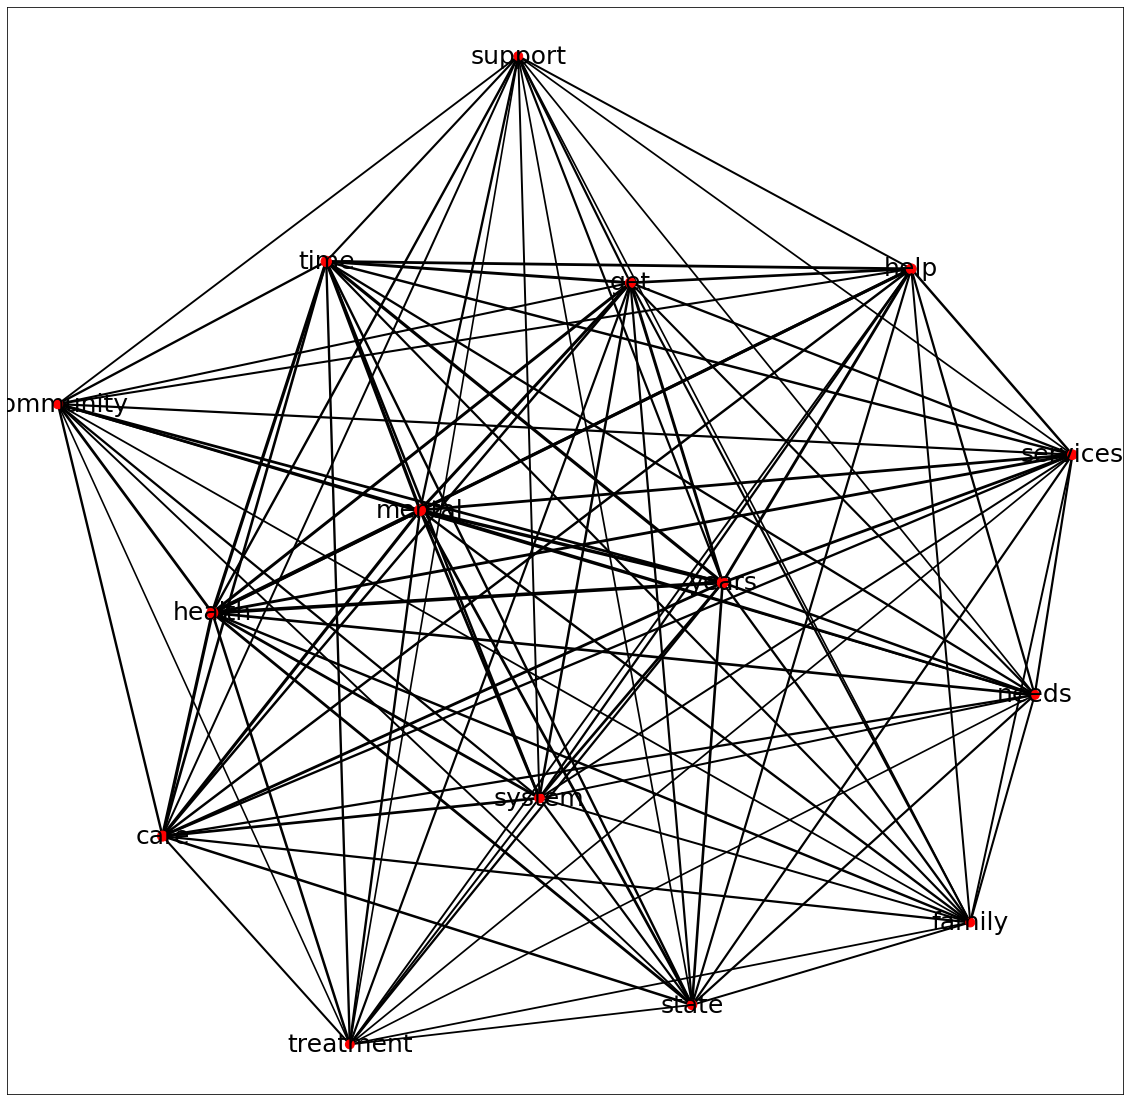

In [164]:
import networkx as nx

G = nx.Graph()

num_nodes = 15

nodes = [item[0] for item in counter.most_common(num_nodes)]
node_weights = [item[1]*2 for item in counter.most_common(num_nodes)]

for word in nodes:
    G.add_node(word, weight=counter.get(word))
    
for word1 in nodes:
    for word2 in nodes:
        if (word1 != word2) & (word2 in co_counter[word1]):
            G.add_edge(word1, word2, weight=co_counter[word1][word2])
            
edges = nx.get_edge_attributes(G, "weight").keys()
edge_weights = nx.get_edge_attributes(G, "weight").values()
edge_weights = [item / 15 for item in edge_weights]

from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos=nx.spring_layout(G), 
                 nodelist=nodes, node_size=node_weights, edgelist=edges, width=edge_weights,
                 node_color="red", with_labels=True, font_size=25)
plt.draw()

In [165]:
from nltk.stem import WordNetLemmatizer
import numpy as np
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# Sentiment analysis using Textblob
def sentiment(tweet):

    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
df2['Sentiment'] = df2['Testimony_Text'].apply(sentiment)

df2.head(20)

,Name,Testimony_Length,Testimony_Text,cluster,words,tagged_words,Testimony_Text_text_splits,Sentiment
0,Ellen Laurence,04:57:00,"Commissioner Conway, members, I thank you for ...",2,"[Commissioner, Conway, ,, members, ,, I, thank...","[(Commissioner, NNP), (Conway, NNP), (,, ,), (...","['Commissioner', 'Conway,', 'members,', 'I', '...",1
1,Jim Cosby,13:38:00,"Hello, my name is Jim Cosby I am a social work...",2,"[Hello, ,, my, name, is, Jim, Cosby, I, am, a,...","[(Hello, NNP), (,, ,), (my, PRP$), (name, NN),...","['Hello,', 'my', 'name', 'is', 'Jim', 'Cosby',...",1
2,Megan Marx Varela,03:52:00,Good afternoon my name is Megan Marx-Varela an...,1,"[Good, afternoon, my, name, is, Megan, Marx-Va...","[(Good, JJ), (afternoon, NN), (my, PRP$), (nam...","['Good', 'afternoon', 'my', 'name', 'is', 'Meg...",1
3,Rebecca Reynolds,04:56:00,Thank you my name is Rebecca Reynolds I use sh...,2,"[Thank, you, my, name, is, Rebecca, Reynolds, ...","[(Thank, NN), (you, PRP), (my, PRP$), (name, N...","['Thank', 'you', 'my', 'name', 'is', 'Rebecca'...",1
4,Ami Gary,06:25:00,"Hello my name is Ami Garry, thank you so much ...",0,"[Hello, my, name, is, Ami, Garry, ,, thank, yo...","[(Hello, NNP), (my, PRP$), (name, NN), (is, VB...","['Hello', 'my', 'name', 'is', 'Ami', 'Garry,',...",1
5,Ben Genzel,10:15:00,My name is Ben Gnezel and this is a little spo...,2,"[My, name, is, Ben, Gnezel, and, this, is, a, ...","[(My, PRP$), (name, NN), (is, VBZ), (Ben, NNP)...","['My', 'name', 'is', 'Ben', 'Gnezel', 'and', '...",1
6,Erin Muransky,05:22:00,I'm a registered and licensed occupational the...,2,"[I, 'm, a, registered, and, licensed, occupati...","[(I, PRP), ('m, VBP), (a, DT), (registered, JJ...","[""I'm"", 'a', 'registered', 'and', 'licensed', ...",1
7,Jean Treaster,06:41:00,"My name is Jean Trester, I am an independent. ...",2,"[My, name, is, Jean, Trester, ,, I, am, an, in...","[(My, PRP$), (name, NN), (is, VBZ), (Jean, JJ)...","['My', 'name', 'is', 'Jean', 'Trester,', 'I', ...",1
8,John Mok Lamme,08:00:00,Good afternoon my name is John Mok Lamme I am ...,4,"[Good, afternoon, my, name, is, John, Mok, Lam...","[(Good, JJ), (afternoon, NN), (my, PRP$), (nam...","['Good', 'afternoon', 'my', 'name', 'is', 'Joh...",1
9,Joseph Bowers,4:58,Family --- is a community center for people wi...,2,"[Family, --, -, is, a, community, center, for,...","[(Family, RB), (--, :), (-, :), (is, VBZ), (a,...","['Family', '---', 'is', 'a', 'community', 'cen...",1


In [89]:
df2.groupby(['Sentiment']).count()

,Name,Testimony_Length,Testimony_Text,cluster,words,tagged_words,Testimony_Text_text_splits
Sentiment,,,,,,,
1,68,68,68,68,68,68,68


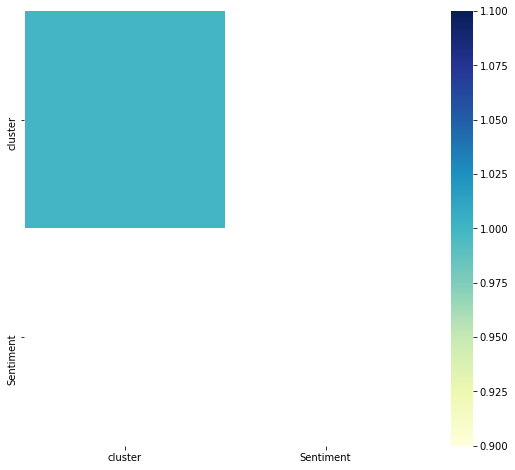

In [90]:
corrmat = df2.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)